# Business Case: Yulu - Hypothesis Testing

1.Define Problem Statement and perform Exploratory Data Analysis (10 points)
    
    1.Definition of problem (as per given problem statement with additional views) 
    
    2. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary. 
    
    3. Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables) 
    
    4. Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count. 
    
    5. Illustrate the insights based on EDA 
        1. Comments on range of attributes, outliers of various attributes 
        2. Comments on the distribution of the variables and relationship between them 
        3. Comments for each univariate and bivariate plots 

### Problem Statement:

    Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
    
    Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!
    
    Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.
    
    Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
    How well those variables describe the electric cycle demands?
    
    Let's find out...

### User defined helper functions which helps for hypothesis testing and their assumptions

In [255]:
def shapiro_test(series):
    print("Mean : ", round(series.mean(),2),", Standard deviation : ",round(series.std(),2))
    
    # calling function for shapiro test
    test_stat, p_value = shapiro(series)   
    
    print("p-value : ", p_value)
    if p_value < 0.05:
        print("Reject H0")
        print("Data is not Gaussian")
    else:
        print("Fail to reject H0")
        print("Data is Gaussian")

In [256]:
def levene_test(series1,series2):
    print("Series1 metrics : ")
    print("Mean : ", round(series1.mean(),2),", Standard deviation : ",round(series1.std(),2))
    print("Series2 metrics : ")
    print("Mean : ", round(series2.mean(),2),", Standard deviation : ",round(series2.std(),2))
    
    # calling function for levene test
    test_stat, p_value = levene(series1,series2)
    
    print("p-value : ", p_value)
    if p_value < 0.05:
        print("Reject H0")
        print("Variances are different")
    else:
        print("Fail to reject H0")
        print("Variances are the same")
    print()

In [257]:
def kstest_test(series):
    mu = series.mean()
    sigma = series.std()
    print("Mean : ", round(series.mean(),2),", Standard deviation : ",round(series.std(),2))
    
    # calling function for ks-test
    test_stat, p_value = kstest(
        series,
        norm.cdf,
        args=(mu, sigma)
    )
    
    print("p-value : ", p_value)
    if p_value < 0.05:
        print("Reject H0")
        print("Data is not Gaussian")
    else:
        print("Fail to reject H0")
        print("Data is Gaussian")

In [258]:
def ttest_ind_test(series1,series2,alternative='two-sided'):
    print("Series1 metrics : ")
    print("Mean : ", round(series1.mean(),2),", Standard deviation : ",round(series1.std(),2))
    print("Series2 metrics : ")
    print("Mean : ", round(series2.mean(),2),", Standard deviation : ",round(series2.std(),2))
    
    # calling function for t-test for 2 independent samples
    t_stat, p_value = ttest_ind(series1,series2,alternative=alternative)
    print("p-value : ", p_value)
    if p_value < 0.05:
        print("Reject H0")
    else:
        print("Fail to reject H0")

In [259]:
def anova_test(series1,series2,series3,series4=None):
    print("Series1 metrics : ")
    print("Mean : ", round(series1.mean(),2),", Standard deviation : ",round(series1.std(),2))
    print("Series2 metrics : ")
    print("Mean : ", round(series2.mean(),2),", Standard deviation : ",round(series2.std(),2))
    print("Series3 metrics : ")
    print("Mean : ", round(series3.mean(),2),", Standard deviation : ",round(series3.std(),2))
    if series4 is not None:
        print("Series4 metrics : ")
        print("Mean : ", round(series4.mean(),2),", Standard deviation : ",round(series4.std(),2))

        f_stat, p_value = f_oneway(series1,series2,series3,series4)
    else:
        f_stat, p_value = f_oneway(series1,series2,series3)
    print("p-value : ", p_value)
    if p_value < 0.05:
        print("Reject H0")
    else:
        print("Fail to reject H0")

Libraries needed for this project

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import shapiro, kstest 
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv("bike_sharing.csv") # read the tabular data file

In [5]:
df.shape  # the data hase 10886 rows and 12 columns

(10886, 12)

In [6]:
df.head()  # first 5 rows of the data, just to have a brief view

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
df.info()   # displays the number of non nulls and data types of each column, we can observe there are no nulls in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])  # convert string to datetime datatype

In [221]:
# extracting the necessary field from the datetime datatype
df['day'] = df['datetime'].dt.day.apply(str)
df['month'] = df['datetime'].dt.month.apply(str)
df['dayofyear'] = df['datetime'].dt.dayofyear.apply(str)
df['week'] = df['datetime'].dt.week.apply(str)
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

/tmp/ipykernel_6116/43653281.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['datetime'].dt.week.apply(str)


In [6]:
# converting the int datatypes to the categorical datatypes which are actually categorical
df['season'] = df['season'].apply(str)
df['holiday'] = df['holiday'].apply(str)
df['weather'] = df['weather'].apply(str)
df['workingday'] = df['workingday'].apply(str)

In [8]:
df.info() # these are the modified datatypes, which will be appropriate to do further analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
 13  month       10886 non-null  object        
 14  dayofyear   10886 non-null  object        
 15  week        10886 non-null  object        
 16  hour        10886 non-

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000
day,10886.0,9.992559,5.476608,1.00,5.0000,10.000,15.0000,19.0000
month,10886.0,6.521495,3.444373,1.00,4.0000,7.000,10.0000,12.0000


In [38]:
df.describe(include='object').T

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412


Here we can observe that for each month there is only data for 19 days i.e from 1st day of the month to 19th day

In [23]:
# grouping the data monthly and getting the min and max of each month
df.groupby(['month'])['datetime'].agg(['min','max'])  

,min,max
month,,
1,2011-01-01,2012-01-19 23:00:00
2,2011-02-01,2012-02-19 23:00:00
3,2011-03-01,2012-03-19 23:00:00
4,2011-04-01,2012-04-19 23:00:00
5,2011-05-01,2012-05-19 23:00:00
6,2011-06-01,2012-06-19 23:00:00
7,2011-07-01,2012-07-19 23:00:00
8,2011-08-01,2012-08-19 23:00:00
9,2011-09-01,2012-09-19 23:00:00


The graph below says, ride bookings grew in summer and fall, but have degrew in the winter

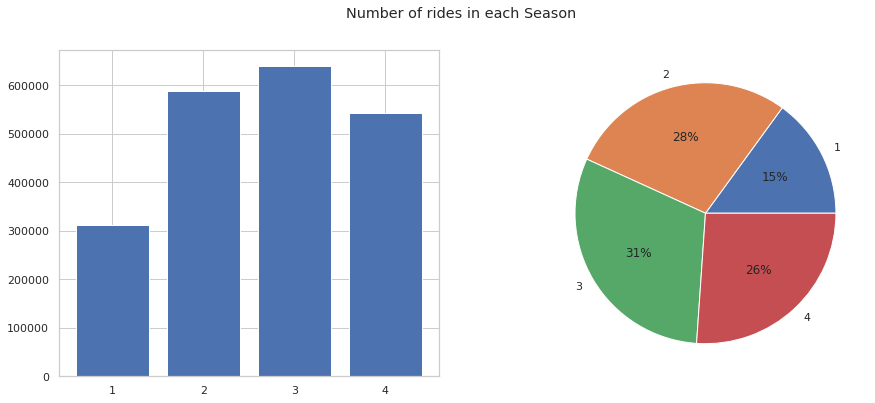

In [78]:
s_vc = df.groupby(['season'])['count'].sum()
fig, axs = plt.subplots(1, 2 , figsize =(15, 6))
fig.suptitle('Number of rides in each Season ')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

Ride bookings decreases as the weather condition deteriotes

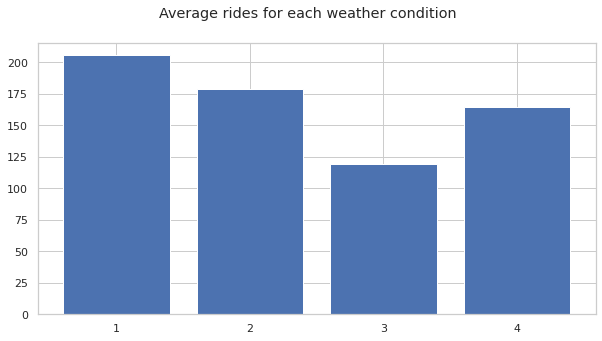

In [247]:
s_vc = df.groupby(['weather'])['count'].mean()
fig, axs = plt.subplots(1, 1 , figsize =(10, 5))
fig.suptitle('Average rides for each weather condition')
axs.bar(s_vc.index,s_vc.values)
plt.show()

Ride bookings doesnt change much comparing working and nonworking day both are almost same

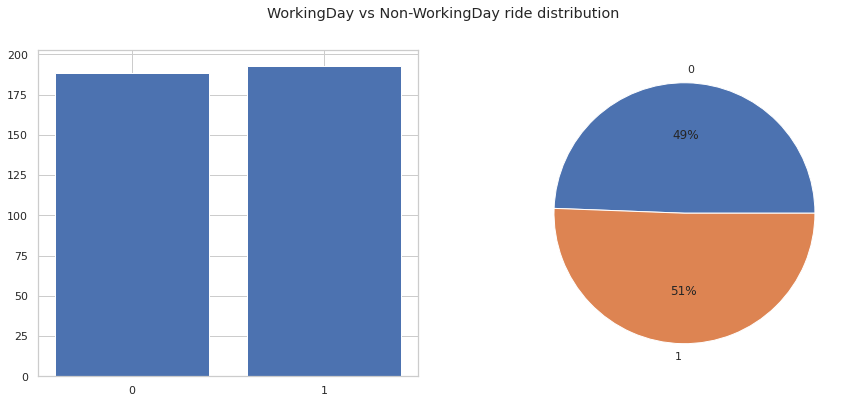

In [250]:
s_vc = df.groupby(['workingday'])['count'].mean()
fig, axs = plt.subplots(1, 2 , figsize =(15, 6))
fig.suptitle('WorkingDay vs Non-WorkingDay ride distribution')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

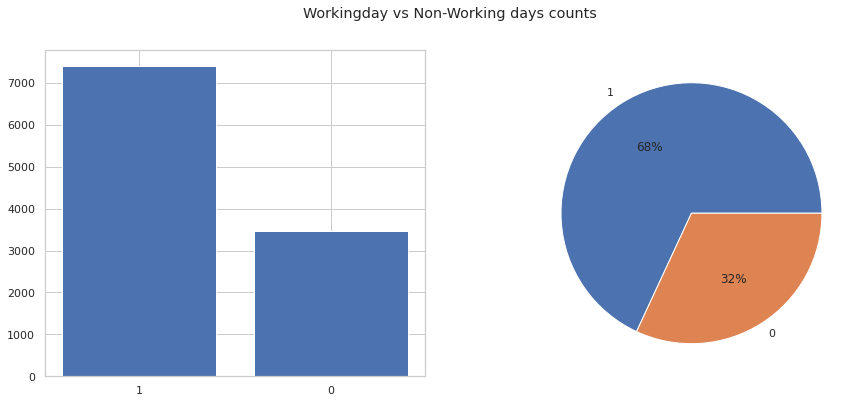

In [249]:
s_vc = df['workingday'].value_counts()
fig, axs = plt.subplots(1, 2 , figsize =(15, 6))
fig.suptitle('Workingday vs Non-Working days counts')
axs[0].bar(s_vc.index,s_vc.values)
axs[1].pie(s_vc.values,labels=s_vc.index, autopct='%1.0f%%')
plt.show()

In [80]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofyear,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,1,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,1,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,1,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,1,52


<AxesSubplot:xlabel='temp', ylabel='count'>

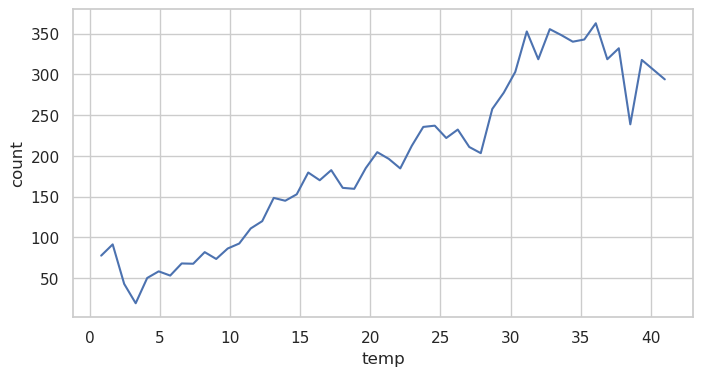

In [129]:
plt.figure(figsize = (8, 4))
sns.lineplot(x='temp',y='count',data=df,estimator=np.mean,ci=None)

Observations:

    1. As the temperature increases the average bookings increases almostly linearly.
    2. People prefer to travel through this bikes at temperatures between 30 and 37,as the data suggests it has  highest bookings average.

<AxesSubplot:xlabel='humidity', ylabel='count'>

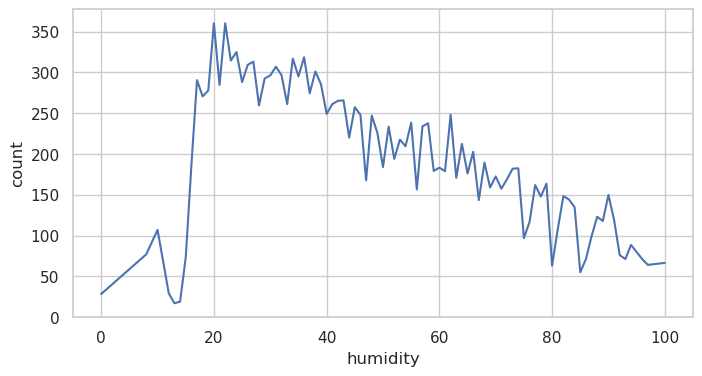

In [130]:
plt.figure(figsize = (8, 4))
sns.lineplot(x='humidity',y='count',data=df,estimator=np.mean,ci=None)

Observations:

    1. The graph shows as the humidity increases the average rides degrease, says an inverse relationship.
    2. We can ignore the values below 20, because the available data is very less to show the projections

<AxesSubplot:xlabel='day', ylabel='count'>

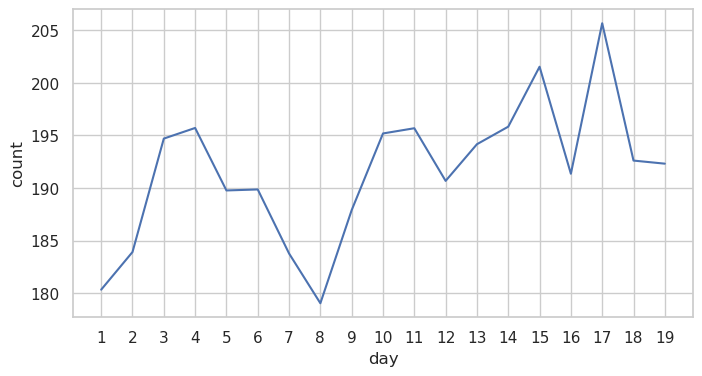

In [137]:
plt.figure(figsize = (8, 4))
sns.lineplot(x='day',y='count',data=df,estimator=np.mean,ci=None)

Observations:
    
    1. 8th day of the month has an unusual trend of very low ride bookings
    2. First 2 weeks bookings are comparitively less than the 3rd week sales

<AxesSubplot:xlabel='month', ylabel='count'>

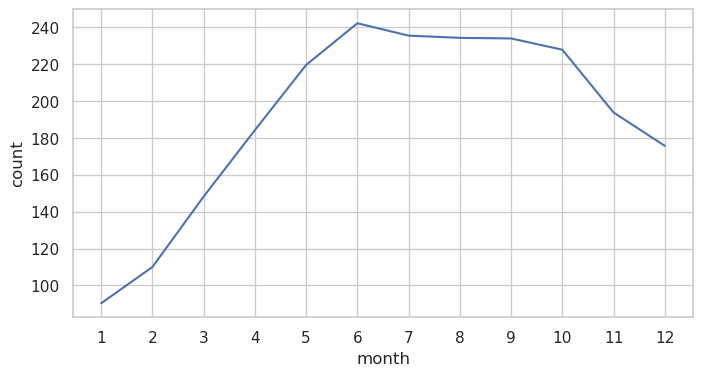

In [138]:
plt.figure(figsize = (8, 4))
sns.lineplot(x='month',y='count',data=df,estimator=np.mean,ci=None)

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

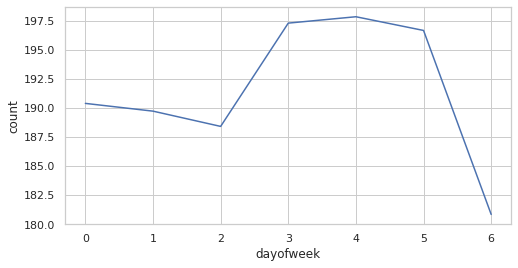

In [225]:
plt.figure(figsize = (8, 4))
sns.lineplot(x='dayofweek',y='count',data=df,estimator=np.mean,ci=None)

Observations:
    
    Here 0-6 represents from Monday - Sunday
    1. Sundays have very low average bookings
    2. Most tend to travel mostly in the days between Thursday to Saturday

In [146]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,dayofyear,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,1,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,1,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,1,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,1,52


<AxesSubplot:xlabel='hour', ylabel='count'>

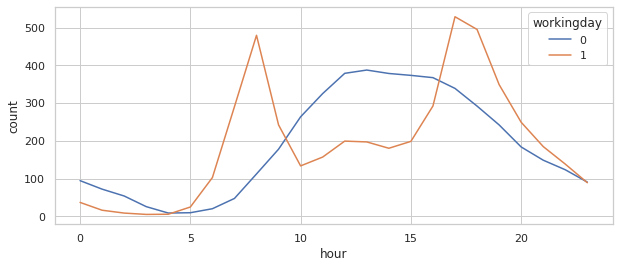

In [26]:
plt.figure(figsize = (10, 4))
sns.lineplot(x='hour',y='count',hue='workingday',data=df,estimator=np.mean,ci=None)

Observations:

    1. Peek rides on week days are between 7-9am and 5-7pm as these are the peak office hours
    2. On weekendsthe peak ride bookings are in between 10am-5pm.
    3. We can clearly see the riders behaviour in comparision with working days and holidays

<AxesSubplot:xlabel='hour', ylabel='casual'>

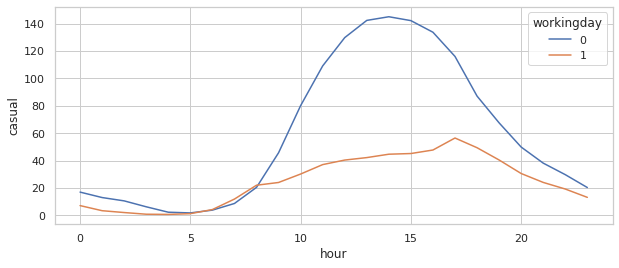

In [23]:
plt.figure(figsize = (10, 4))
sns.lineplot(x='hour',y='casual',hue='workingday',data=df,estimator=np.mean,ci=None)

Observations:
    
    Most of the people who book on weekends are casual riders, they might not be our repeated customers, so people who use on weekdays are more loyal customers and repeated customers.

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

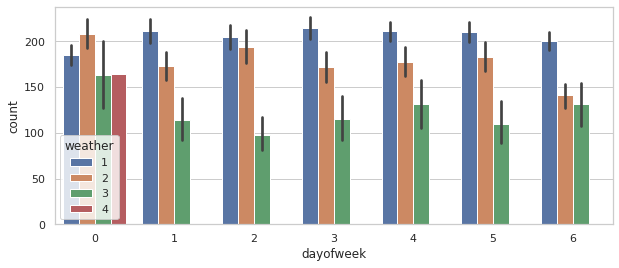

In [241]:
plt.figure(figsize = (10, 4))
sns.barplot(x='dayofweek',y='count',hue='weather',data=df)

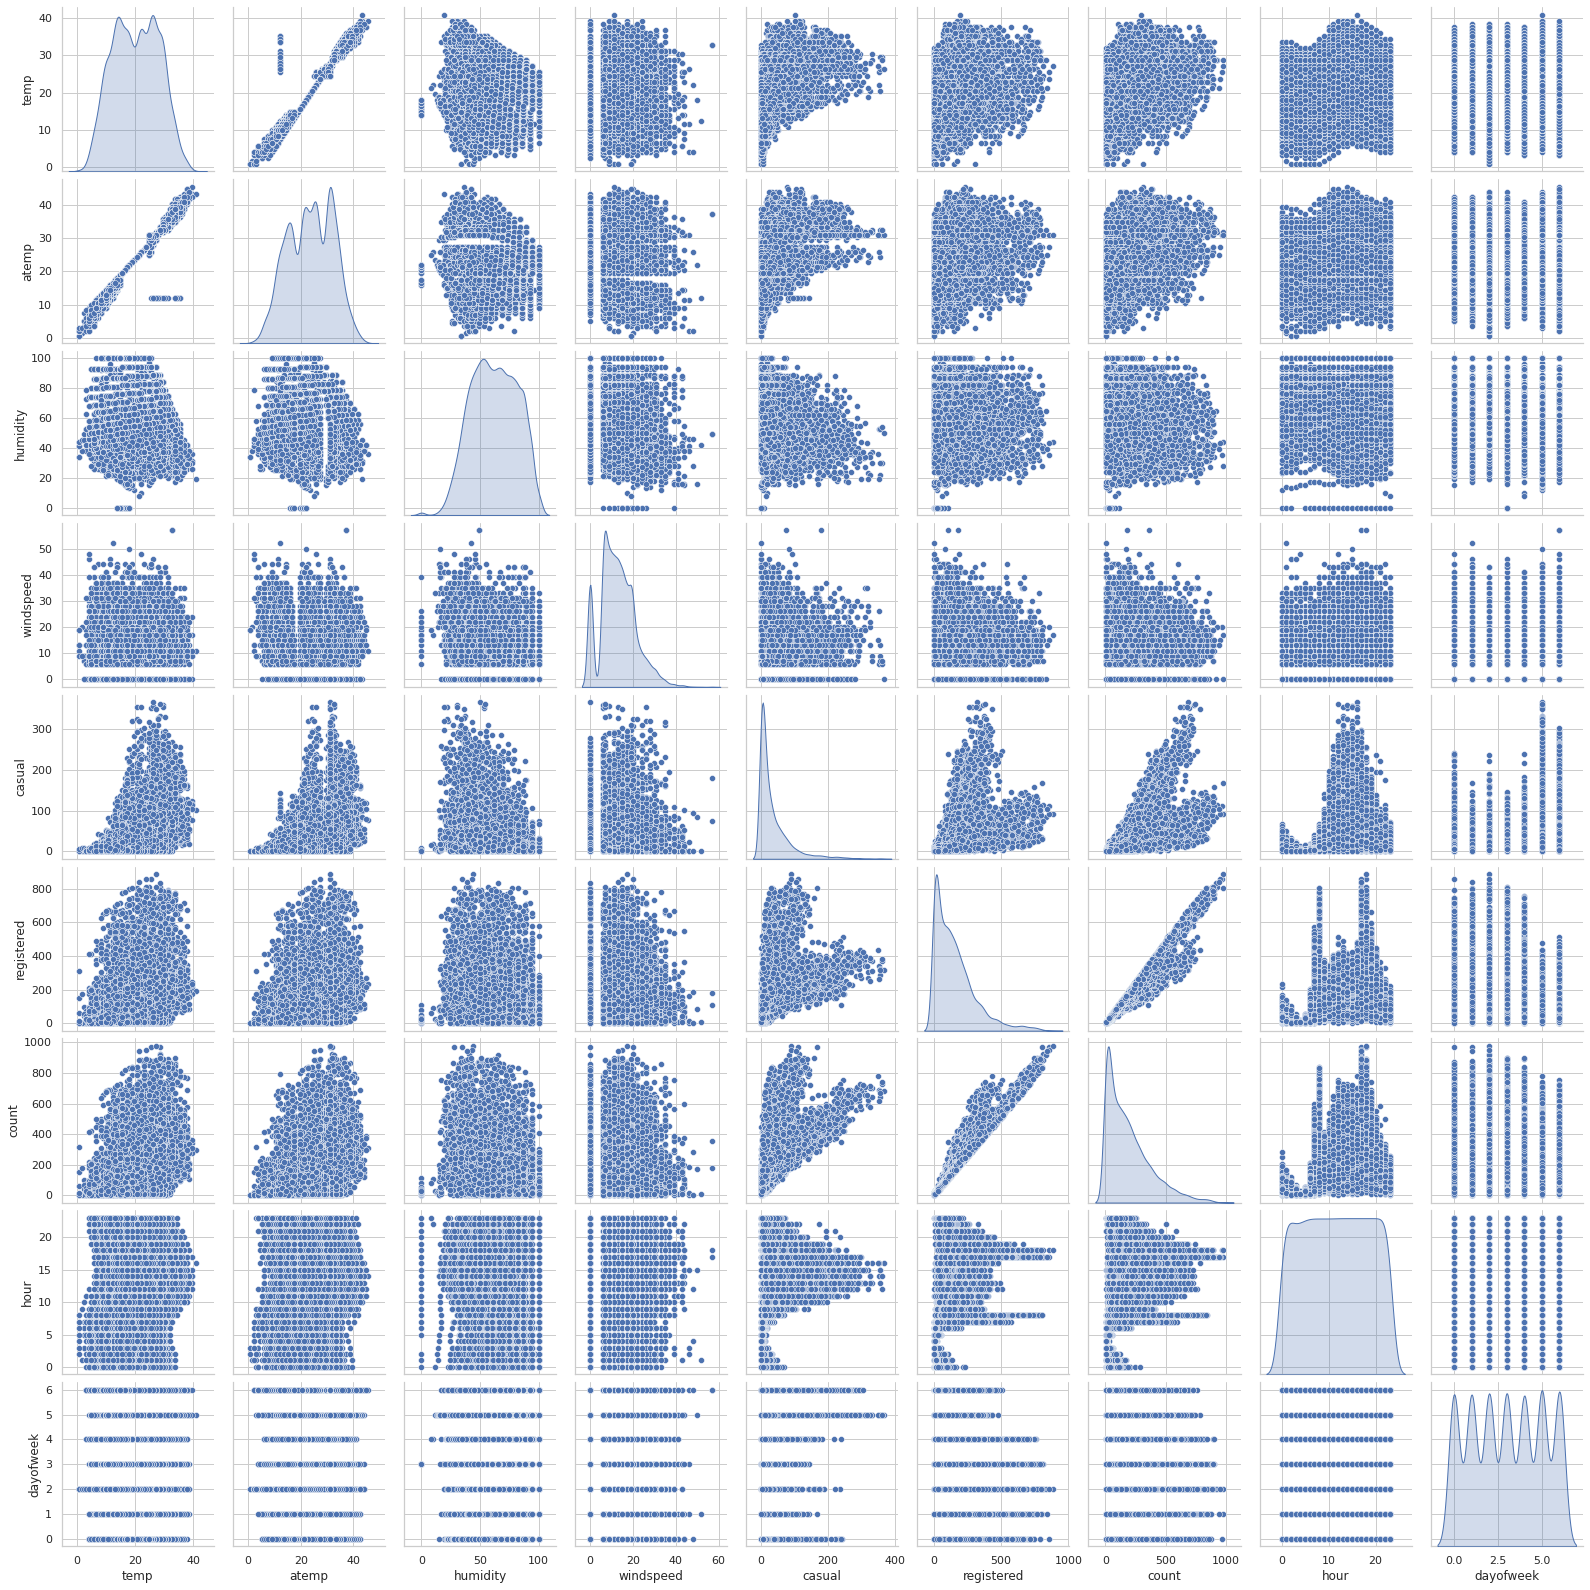

In [246]:
sns.pairplot(data=df,diag_kind='kde')

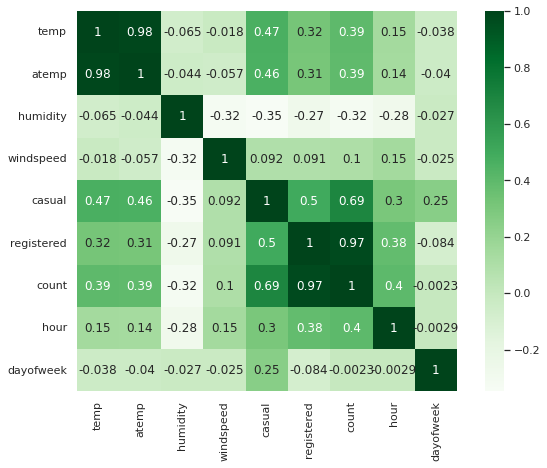

In [244]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(df.corr(),
            annot=True,cmap='Greens',square=True)

Observations:

    1. Temperature is more correlated with casual riders compared to registered riders.
    2. Humidity has negative correlation with windspeed, ride counts, hour
    3. Registered users have high correlation with total rides,than casual users with total rides
    4. total ride bookings have good correlation with hour of booking
    5. day of week has correlation with casual riders, so people who travel casually have correlation with the day of the week they travel


## 2. Hypothesis Testing (30 Points):

<AxesSubplot:xlabel='count', ylabel='Count'>

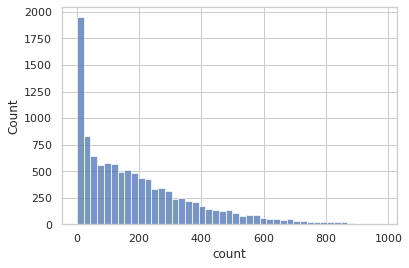

In [32]:
sns.histplot(df['count'])

/home/bharath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


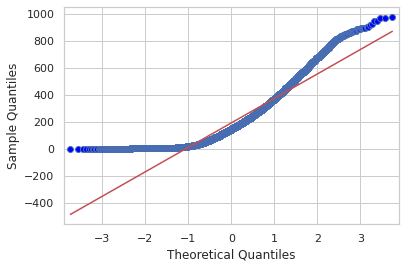

In [12]:
# QQ plot - visual way of confirming gaussian distribution
qqplot(df['count'], line="s")
plt.show()

Observations:

    1. From the qqplot we can interpret that data in the middle part follows the normal distribution, but the tails doesnt.

In [41]:
df['workingday'].unique()

array(['0', '1'], dtype=object)

H0: Data is Gaussian \
Ha: Data is not Gaussian

test : shapiro, kstest

p-value : 0.05

In [102]:
shapiro_test(df['count'].sample(400))

Mean :  187.91 , Standard deviation :  187.74
8.829537823422984e-19
Reject H0
Data is not Gaussian


According to the Shapiro test the probability to be gaussian is way too less we reject the null hypothesis and hence the ride booking data isnt gaussian

In [104]:
kstest_test(df['count'].sample(1000))

Mean :  192.35 , Standard deviation :  185.28
2.4740725155571976e-20
Reject H0
Data is not Gaussian


According to the KS test the probability to be gaussian is way too less we reject the null hypothesis and hence the ride booking data isnt gaussian

H0: Data has same variance within groups of workingday and holiday \
Ha: Data has different variance within groups of workingday and holiday

test : levene

p-value : 0.05

In [105]:
df_wkday = df.loc[df['workingday']=='1']
df_holiday = df.loc[df['workingday']=='0']

In [106]:
levene_test(df_wkday['count'],df_wkday['count'])

Series1 metrics : 
Mean :  193.01 , Standard deviation :  184.51
Series2 metrics : 
Mean :  193.01 , Standard deviation :  184.51
1.0
Fail to reject H0
Variances are the same



According to the Levene test the probability having the same variance is way too high, so we fail to reject the null hypothesis and hence the ride booking data for working day and non-working day has same same spread in the distribution

H0: Data has same variance within groups of workingday and holiday \
Ha: Data has different variance within groups of workingday and holiday

test : levene

p-value : 0.05

In [108]:
df['season'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [109]:
df_weather1 = df.loc[df['weather']=='1','count']
df_weather2 = df.loc[df['weather']=='2','count']
df_weather3 = df.loc[df['weather']=='3','count']
df_weather4 = df.loc[df['weather']=='4','count']

In [110]:
print("Variance test for weather data : 1 and 2")
levene_test(df_weather1,df_weather2)
print("Variance test for weather data : 1 and 3")
levene_test(df_weather1,df_weather3)
print("Variance test for weather data : 1 and 4")
levene_test(df_weather1,df_weather4)
print("Variance test for weather data : 2 and 3")
levene_test(df_weather2,df_weather3)
print("Variance test for weather data : 2 and 4")
levene_test(df_weather2,df_weather4)
print("Variance test for weather data : 3 and 4")
levene_test(df_weather3,df_weather4)


Variance test for weather data : 1 and 2
Series1 metrics : 
Mean :  205.24 , Standard deviation :  187.96
Series2 metrics : 
Mean :  178.96 , Standard deviation :  168.37
3.49541909725777e-10
Reject H0
Variances are different

Variance test for weather data : 1 and 3
Series1 metrics : 
Mean :  205.24 , Standard deviation :  187.96
Series2 metrics : 
Mean :  118.85 , Standard deviation :  138.58
3.766646059363359e-32
Reject H0
Variances are different

Variance test for weather data : 1 and 4
Series1 metrics : 
Mean :  205.24 , Standard deviation :  187.96
Series2 metrics : 
Mean :  164.0 , Standard deviation :  nan
0.2552894702604411
Fail to reject H0
Variances are the same

Variance test for weather data : 2 and 3
Series1 metrics : 
Mean :  178.96 , Standard deviation :  168.37
Series2 metrics : 
Mean :  118.85 , Standard deviation :  138.58
2.031067178520127e-15
Reject H0
Variances are different

Variance test for weather data : 2 and 4
Series1 metrics : 
Mean :  178.96 , Standard dev

According to the Levene test from the above we see that variances of 1, 4 and 3,4 and 2,4 fail to reject the null hypothesis and the variances of 1,2 and 1,3 and 2,3 rejects the null hypothesis

In [111]:
df_season1 = df.loc[df['season']=='1','count']
df_season2 = df.loc[df['season']=='2','count']
df_season3 = df.loc[df['season']=='3','count']
df_season4 = df.loc[df['season']=='4','count']

In [112]:
print("Variance test for season data : 1 and 2")
levene_test(df_season1,df_season2)
print("Variance test for season data : 1 and 3")
levene_test(df_season1,df_season3)
print("Variance test for season data : 1 and 4")
levene_test(df_season1,df_season4)
print("Variance test for season data : 2 and 3")
levene_test(df_season2,df_season3)
print("Variance test for season data : 2 and 4")
levene_test(df_season2,df_season4)
print("Variance test for season data : 3 and 4")
levene_test(df_season3,df_season4)


Variance test for season data : 1 and 2
Series1 metrics : 
Mean :  116.34 , Standard deviation :  125.27
Series2 metrics : 
Mean :  215.25 , Standard deviation :  192.01
9.72630153046414e-93
Reject H0
Variances are different

Variance test for season data : 1 and 3
Series1 metrics : 
Mean :  116.34 , Standard deviation :  125.27
Series2 metrics : 
Mean :  234.42 , Standard deviation :  197.15
4.930332866006357e-102
Reject H0
Variances are different

Variance test for season data : 1 and 4
Series1 metrics : 
Mean :  116.34 , Standard deviation :  125.27
Series2 metrics : 
Mean :  198.99 , Standard deviation :  177.62
2.542187031248091e-61
Reject H0
Variances are different

Variance test for season data : 2 and 3
Series1 metrics : 
Mean :  215.25 , Standard deviation :  192.01
Series2 metrics : 
Mean :  234.42 , Standard deviation :  197.15
0.2505258503598953
Fail to reject H0
Variances are the same

Variance test for season data : 2 and 4
Series1 metrics : 
Mean :  215.25 , Standard dev

According to the Levene test from the above we see that variances of 2,3 fail to reject the null hypothesis and the variances of rest of the hypothesis rejects the null hypothesis

## 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)

### t-test for 2 independent samples comparision

H0: mean bike rentals on working days is equal to mean bike rentals of holidays \
Ha: mean bike rentals on working days is not-equal to mean bike rentals of holidays

hypothesis test : T-test for independent samples \
p-value : 0.05 (two-tailed)

In [121]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Density'>

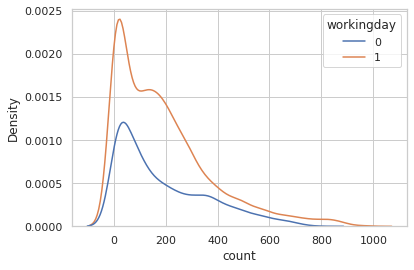

In [148]:
sns.kdeplot(x='count',data=df,hue='workingday')

In [113]:
wkday = df.loc[df['workingday']=='1','count']
holiday = df.loc[df['workingday']=='0','count']

In [150]:
ttest_ind_test(wkday.sample(500),holiday.sample(500),alternative='two-sided')

Series1 metrics : 
Mean :  201.0 , Standard deviation :  190.35
Series2 metrics : 
Mean :  193.14 , Standard deviation :  175.17
p-value :  0.4974719510201552
Fail to reject H0


The t-test for the 2 samples of the working and non-working day fail to reject the null hypothesis, from the above graph also we can interpret that both the distributions of working and non-working days falls in the same range, hence there is no any significant difference in ride bookings, weather its a working day or non-working day.

## ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)

### ANOVA 4 samples comparision for Weather  with count of bike rentals

H0: mean bike rentals for different weather are same \
Ha: mean bike rentals for different weather are not same

hypothesis test : Anova \
p-value : 0.05

In [163]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

/home/bharath/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

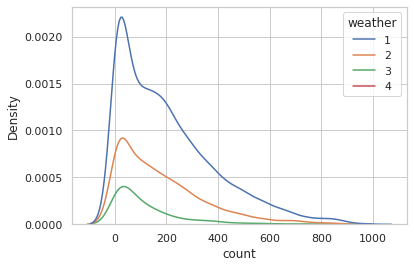

In [172]:
sns.kdeplot(x='count',data=df,hue='weather')

In [159]:
weather1 = df.loc[df['weather']=='1','count']
weather2 = df.loc[df['weather']=='2','count']
weather3 = df.loc[df['weather']=='3','count']
weather4 = df.loc[df['weather']=='4','count']

In [168]:
anova_test(weather1,weather2,weather3)

Series1 metrics : 
Mean :  205.24 , Standard deviation :  187.96
Series2 metrics : 
Mean :  178.96 , Standard deviation :  168.37
Series3 metrics : 
Mean :  118.85 , Standard deviation :  138.58
p-value :  4.976448509904196e-43
Reject H0


Annova test rejects the null hypothesis for the different weather samples, so we can say that weather have significant impact on the bike ride bookings

### ANOVA 4 samples comparision for Season  with count of bike rentals

H0: mean bike rentals for different seasons are same \
Ha: mean bike rentals for different seasons are not same

hypothesis test : Anova \
p-value : 0.05

In [169]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Density'>

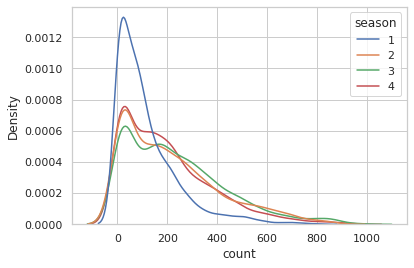

In [173]:
sns.kdeplot(x='count',data=df,hue='season')

In [161]:
season1 = df.loc[df['season']=='1','count']
season2 = df.loc[df['season']=='2','count']
season3 = df.loc[df['season']=='3','count']
season4 = df.loc[df['season']=='4','count']

In [170]:
anova_test(season1,season2,season3,season4)

Series1 metrics : 
Mean :  116.34 , Standard deviation :  125.27
Series2 metrics : 
Mean :  215.25 , Standard deviation :  192.01
Series3 metrics : 
Mean :  234.42 , Standard deviation :  197.15
Series4 metrics : 
Mean :  198.99 , Standard deviation :  177.62
p-value :  6.164843386499654e-149
Reject H0


Annova test rejects the null hypothesis for the different season samples, so we can say that season have significant impact on the bike ride bookings

### Till now we have done hypothesis testing for the data that is at the granular level of hour, now lets convert the data to daily granular level and do the analysis,  we are doing this because, day level granularity might provide better analysis when comparing with seasons,weather, working day

In [174]:
df['date'] = df['datetime'].dt.date

In [175]:
df_season = df[['date','season']].drop_duplicates()
df_workingday = df[['date','workingday']].drop_duplicates()
df_weather = df[['date','weather']].drop_duplicates()

In [176]:
df_ = df.groupby(['date'])['count'].sum().reset_index()

In [177]:
df_ = df_.merge(df_season,on='date')
df_ = df_.merge(df_workingday,on='date')
df_ = df_.merge(df_weather,on='date')

/home/bharath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


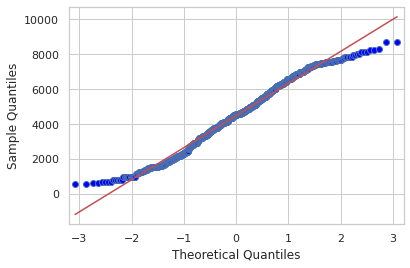

In [251]:
# QQ plot - visual way of confirming gaussian distribution
qqplot(df_['count'], line="s")
plt.show()

We can observe from the above graph that this graph is more normally distributed compared to the hourly granular data

H0: Data is Gaussian \
Ha: Data is not Gaussian

test : shapiro, kstest

p-value : 0.05

In [253]:
shapiro_test(df_['count'].sample(200))
print()
kstest_test(df_['count'].sample(200))

Mean :  4385.41 , Standard deviation :  1836.51
p-value :  0.000882214168086648
Reject H0
Data is not Gaussian

Mean :  4559.15 , Standard deviation :  1802.44
p-value :  0.8635154491455485
Fail to reject H0
Data is Gaussian


Shapiro test says that data isnt gaussian, but KS test says that data is gaussian with high probability

### t-test for 2 independent samples comparision

H0: mean bike rentals on working days is equal to mean bike rentals of holidays \
Ha: mean bike rentals on working days is not-equal to mean bike rentals of holidays

hypothesis test : T-test for independent samples \
p-value : 0.05 (two-tailed)

<AxesSubplot:xlabel='count', ylabel='Density'>

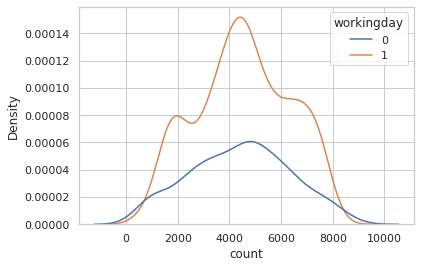

In [178]:
sns.kdeplot(x='count',data=df_,hue='workingday')

In [179]:
wkday = df_.loc[df['workingday']=='1','count']
holiday = df_.loc[df['workingday']=='0','count']

In [254]:
ttest_ind_test(wkday.sample(200),holiday.sample(200),alternative='greater')

Series1 metrics : 
Mean :  4643.28 , Standard deviation :  1805.65
Series2 metrics : 
Mean :  4142.3 , Standard deviation :  1930.62
p-value :  0.00383100481107288
Reject H0


The t-test for the 2 samples of the working and non-working day reject the null hypothesis, hence there is significant difference in ride bookings between working day and holiday, so when tested with the hour granularity we rejected the null hypothesis, but with the more meaningfull daily data, we reject the null hypothesis

### ANOVA 4 samples comparision for Season and Weather categories with count of bike rentals

H0: mean bike rentals for different weather are same \
Ha: mean bike rentals for different weather are not same

hypothesis test : Anova \
p-value : 0.05

In [183]:
df_['weather'].value_counts()

1    434
2    346
3    187
4      1
Name: weather, dtype: int64

/home/bharath/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

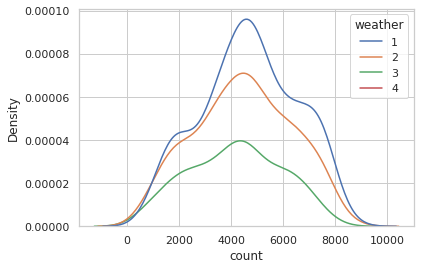

In [184]:
sns.kdeplot(x='count',data=df_,hue='weather')

In [194]:
weather1 = df_.loc[df_['weather']=='1','count']
weather2 = df_.loc[df_['weather']=='2','count']
weather3 = df_.loc[df_['weather']=='3','count']
weather4 = df_.loc[df_['weather']=='4','count']

In [195]:
anova_test(weather1,weather2,weather3)

Series1 metrics : 
Mean :  4673.6 , Standard deviation :  1834.22
Series2 metrics : 
Mean :  4457.73 , Standard deviation :  1853.27
Series3 metrics : 
Mean :  4158.45 , Standard deviation :  1771.03
p-value :  0.00510788106106782
Reject H0


H0: mean bike rentals for different seasons are same \
Ha: mean bike rentals for different seasons are not same

hypothesis test : Anova \
p-value : 0.05

<AxesSubplot:xlabel='count', ylabel='Density'>

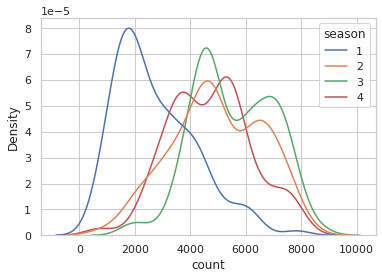

In [198]:
sns.kdeplot(x='count',data=df_,hue='season')

In [196]:
season1 = df_.loc[df_['season']=='1','count']
season2 = df_.loc[df_['season']=='2','count']
season3 = df_.loc[df_['season']=='3','count']
season4 = df_.loc[df_['season']=='4','count']

In [197]:
anova_test(season1,season2,season3,season4)

Series1 metrics : 
Mean :  2754.77 , Standard deviation :  1450.68
Series2 metrics : 
Mean :  4963.92 , Standard deviation :  1640.56
Series3 metrics : 
Mean :  5553.77 , Standard deviation :  1426.92
Series4 metrics : 
Mean :  4718.94 , Standard deviation :  1485.44
p-value :  2.5221443728393988e-84
Reject H0


Both season and weather have significant impact on ride bookings

## Chi-square test to check if Weather is dependent on the season (10 points)

In [210]:
s_h  = pd.crosstab(df['season'],df.loc[df['weather']!='4','weather'])

In [211]:
s_h

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


H0: Gender and product are not related \
Ha: Gender impacts which product

hypothesis test : Chi-square test \
p-value : 0.05

In [213]:
chi_stat, p_value, dof, expected = chi2_contingency(s_h)

print(p_value)
print(dof)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")


2.8260014509929343e-08
6
Reject H0


According to the chi-square test we can conclude that weather is dependent on season